In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vega_datasets import data

In [2]:
date_df = data.sf_temps()
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
# set index
date_df=date_df.set_index('date')

In [4]:
# find the mean
ave=date_df.resample('D').mean()

<AxesSubplot:xlabel='date'>

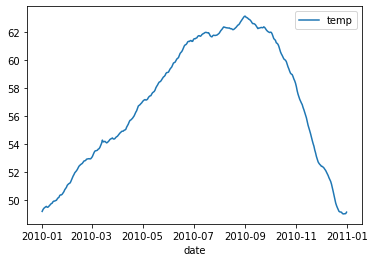

In [5]:
# plot
sns.lineplot(data=ave)


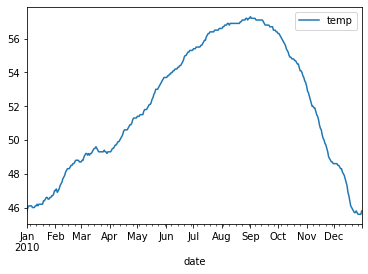

In [6]:
# find the min and plot
date_df.resample('D').min().plot()
plt.show()

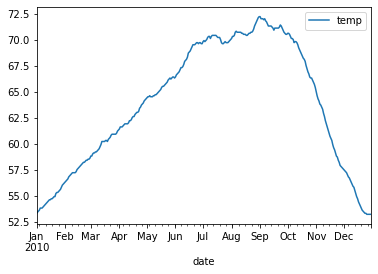

In [7]:
# find the max and plot
date_df.resample('D').max().plot()
plt.show()

In [8]:
# coldest month
date_df.resample('m').mean().head(1)

,temp
date,
2010-01-31,49.98414


In [9]:
date_df.resample('m').mean().sort_values('temp',ascending=False).head(1)

,temp
date,
2010-09-30,62.487083


In [10]:
date_df = date_df.resample('D').agg(['min','max'] ).temp
date_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [11]:
date_df['diff'] = date_df['max'] - date_df['min']
date_df

,min,max,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [12]:
date_df.resample('M').max().sort_values('diff',ascending=False)

,min,max,diff
date,,,
2010-08-31,57.2,72.2,15.0
2010-09-30,57.3,72.2,14.9
2010-06-30,55.3,69.7,14.8
2010-07-31,56.6,70.4,14.8
2010-10-31,56.3,70.6,14.4
2010-05-31,53.7,66.4,13.1
2010-04-30,51.3,64.3,13.0
2010-03-31,49.6,61.3,12.0
2010-11-30,53.2,65.0,11.8


In [13]:
from vega_datasets import data
rain_df=data.seattle_weather()

In [14]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [15]:
rain_df=rain_df.set_index('date')

In [16]:
rain_df['y=m']=rain_df.index.strftime('%Y-%b')

In [17]:
rain_df.groupby('y=m').agg('sum').precipitation.sort_values(ascending=False)

y=m
2015-Dec    284.5
2014-Mar    240.0
2015-Nov    212.6
2012-Nov    210.5
2012-Mar    183.0
2012-Dec    174.0
2012-Jan    173.3
2014-Oct    171.5
2012-Oct    170.3
2013-Sep    156.8
2014-Feb    155.2
2013-Apr    149.6
2015-Feb    134.2
2014-Nov    123.1
2015-Oct    122.4
2014-Dec    121.8
2015-Mar    113.5
2014-Apr    106.1
2013-Jan    105.7
2013-Nov     96.3
2014-Jan     94.0
2015-Jan     93.0
2012-Feb     92.3
2015-Aug     83.3
2014-May     80.0
2012-Jun     75.1
2013-Mar     69.7
2012-Apr     68.1
2013-May     60.5
2014-Sep     56.7
2012-May     52.2
2015-Apr     51.6
2014-Aug     46.0
2013-Dec     42.4
2013-Feb     40.3
2013-Oct     39.2
2013-Aug     34.4
2013-Jun     33.1
2012-Jul     26.3
2015-Sep     21.1
2014-Jul     19.6
2014-Jun     18.8
2015-May     14.8
2015-Jun      5.9
2015-Jul      2.3
2012-Sep      0.9
2013-Jul      0.0
2012-Aug      0.0
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

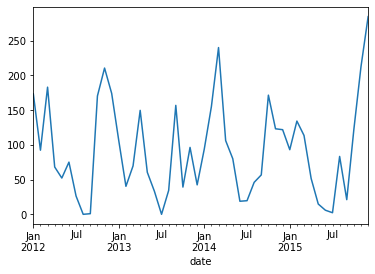

In [18]:
rain_df.resample('m').sum().precipitation.plot()

<AxesSubplot:xlabel='date'>

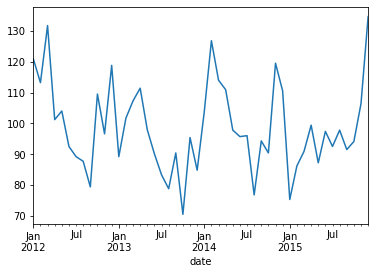

In [19]:
rain_df.resample('m').sum().wind.plot()

In [20]:
rain_df.groupby('y=m').agg('sum').wind.sort_values(ascending=False)

y=m
2015-Dec    134.6
2012-Mar    131.7
2014-Feb    126.8
2012-Jan    120.9
2014-Nov    119.5
2012-Dec    118.8
2014-Mar    114.0
2012-Feb    113.2
2013-Apr    111.4
2014-Apr    110.9
2014-Dec    110.5
2012-Oct    109.5
2013-Mar    107.3
2015-Nov    106.4
2012-May    104.0
2014-Jan    103.8
2013-Feb    101.7
2012-Apr    101.2
2015-Apr     99.4
2013-May     97.9
2014-May     97.8
2015-Aug     97.8
2015-Jun     97.4
2012-Nov     96.6
2014-Jul     96.0
2014-Jun     95.7
2013-Nov     95.4
2014-Sep     94.3
2015-Oct     94.1
2015-Jul     92.5
2012-Jun     92.5
2015-Sep     91.5
2015-Mar     90.9
2014-Oct     90.4
2013-Sep     90.4
2013-Jun     90.1
2013-Jan     89.2
2012-Jul     89.2
2012-Aug     87.7
2015-May     87.2
2015-Feb     86.2
2013-Dec     84.8
2013-Jul     83.3
2012-Sep     79.4
2013-Aug     78.8
2014-Aug     76.8
2015-Jan     75.3
2013-Oct     70.5
Name: wind, dtype: float64

In [21]:
rain_df[rain_df['weather']=='sun'].resample('Y').count().sort_values('weather',ascending=False)

,precipitation,temp_max,temp_min,wind,weather,y=m
date,,,,,,
2014-12-31,211,211,211,211,211,211
2013-12-31,205,205,205,205,205,205
2015-12-31,180,180,180,180,180,180
2012-12-31,118,118,118,118,118,118


In [22]:
rain_df[rain_df['weather']=='rain'].index.strftime('%b').value_counts()

Feb    40
Mar    37
Jan    35
Nov    25
Dec    23
Apr    20
Oct    20
Jun    19
May    16
Jul    14
Aug     6
Sep     4
Name: date, dtype: int64

In [23]:
rain_df[rain_df['precipitation']>0].index.strftime('%b').value_counts()

Dec    81
Feb    73
Mar    73
Nov    71
Jan    66
Oct    61
Apr    59
Jun    37
Sep    35
May    34
Aug    22
Jul    11
Name: date, dtype: int64

In [24]:
flight_df=data.flights_20k()

In [25]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [29]:
flight_df=flight_df.set_index('date')

In [30]:
flight_df['delay']=np.where(flight_df.delay<=0,0,flight_df.delay)

In [31]:
flight_df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


In [39]:
flight_df.groupby(flight_df.index.hour).agg('mean').sort_values('delay',ascending=False)

,delay,distance
date,,
3,302.500000,322.000000
1,170.000000,256.000000
0,127.916667,424.583333
23,65.353846,369.107692
22,32.704607,374.978320
21,21.626768,397.796518
20,17.889778,450.998222
19,16.256557,501.912295
18,14.514218,516.674566


In [49]:
flight_df.groupby(flight_df.index.day_name()).agg('mean').sort_values('delay',ascending=False)

,delay,distance
date,,
Friday,17.757596,501.118230
Thursday,12.821322,485.175025
Wednesday,11.032478,501.009094
Sunday,10.413542,507.987758
Tuesday,9.410866,496.021732
Saturday,8.431498,550.889031
Monday,7.165772,505.032215


In [50]:
flight_df.groupby(flight_df.index.month).agg('mean').sort_values('delay',ascending=False)

,delay,distance
date,,
2,12.306106,511.156170
1,11.301592,500.391952
3,9.875287,504.712069
